In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


#read raw data
df1 = pd.read_csv(r'Y:\OM ONLY_Shared Documents\5 Reports with Power Query\Source Data\ML Application_Clustering\CLEANED_Monthly_Sales_KPEI_2ND.csv')


In [5]:
df1.head()

,month,LSS01,LSS02,LSS03,LSS04,LSS05,LSS06,LSS07,LSS08,LSS09,...,LSS29,LSS30,LSSSET03,LSSM101,LSSM102,LSSM104,LSSM110,LSSM111,LSSM112,LSSM113
0,201801,366,366,366,366,366,366,366,366,366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201802,2232,2232,2232,2238,2238,2238,2232,2232,2238,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201803,11328,11274,9912,11202,9510,10608,9414,8982,9456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201804,10056,9837,6048,9198,5868,9132,6336,5142,5844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201805,12942,12330,6738,11778,6174,10944,7470,5448,6390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filling the Nan values to Zero

In [6]:
df1 = df1.replace(np.NaN,0)
df = df1.iloc[:,1:-1]
df.info()
#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 98 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LSS01          45 non-null     int64  
 1   LSS02          45 non-null     int64  
 2   LSS03          45 non-null     int64  
 3   LSS04          45 non-null     int64  
 4   LSS05          45 non-null     int64  
 5   LSS06          45 non-null     int64  
 6   LSS07          45 non-null     int64  
 7   LSS08          45 non-null     int64  
 8   LSS09          45 non-null     int64  
 9   LSS093HKSET01  45 non-null     float64
 10  LSS10          45 non-null     int64  
 11  LSS101         45 non-null     float64
 12  LSS102         45 non-null     float64
 13  LSS103         45 non-null     float64
 14  LSS104         45 non-null     float64
 15  LSS105         45 non-null     float64
 16  LSS106         45 non-null     float64
 17  LSS107         45 non-null     float64
 18  LSS108      

## Visualize Raw Data

In [9]:
df_50 = df.iloc[:,0:50]
df_100 = df.iloc[:,51:100]

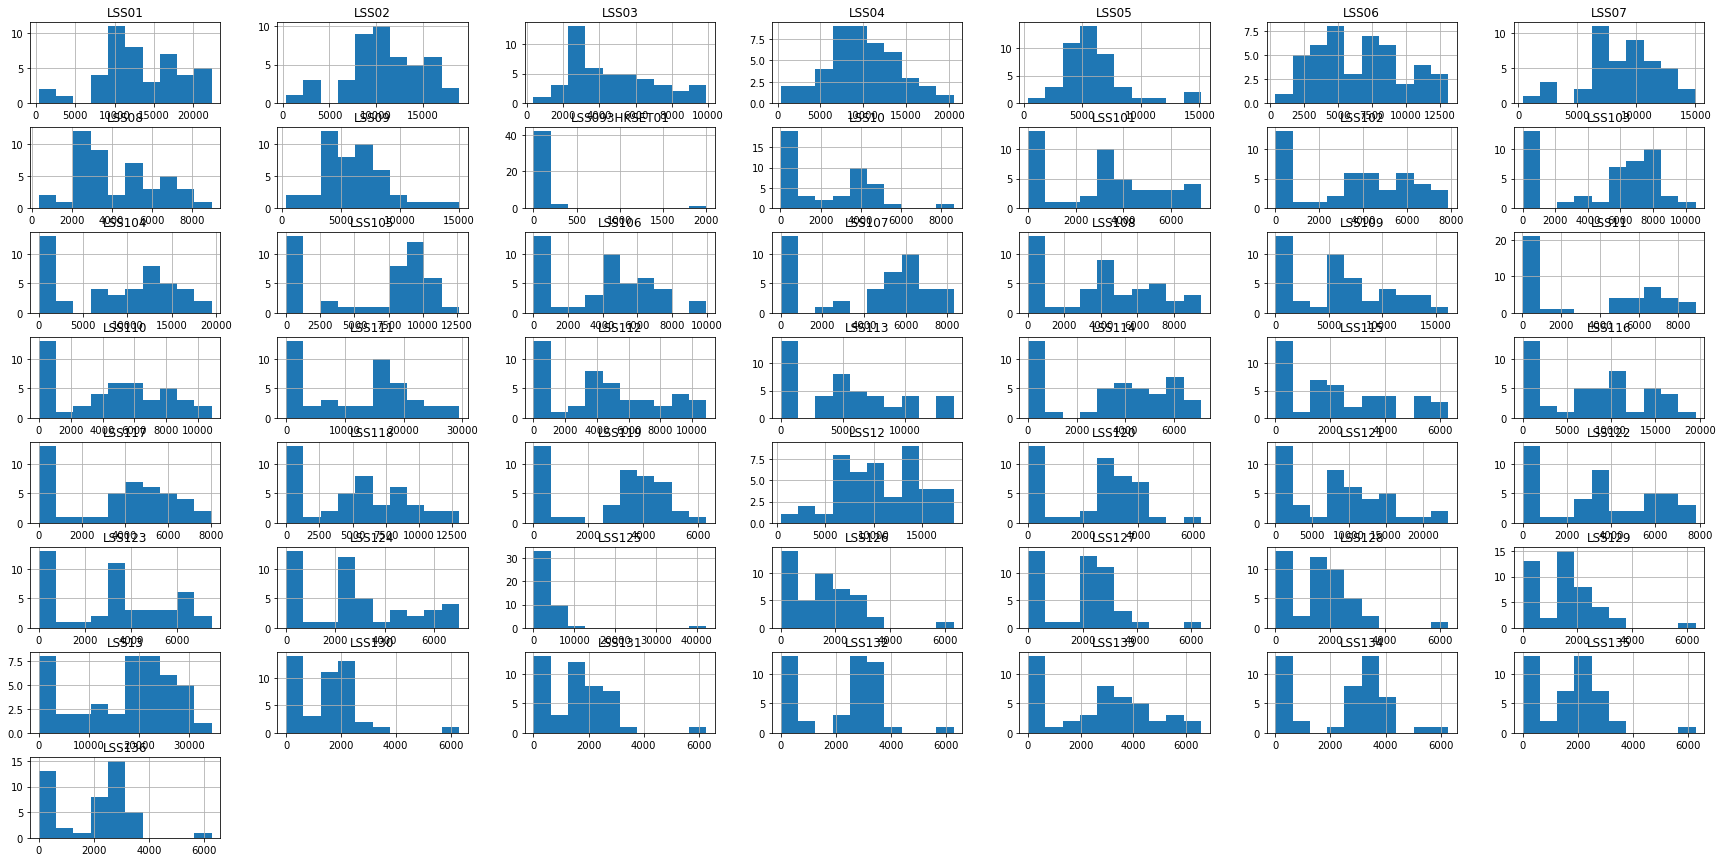

In [10]:

df_50.hist(figsize=(30,15))
plt.show()


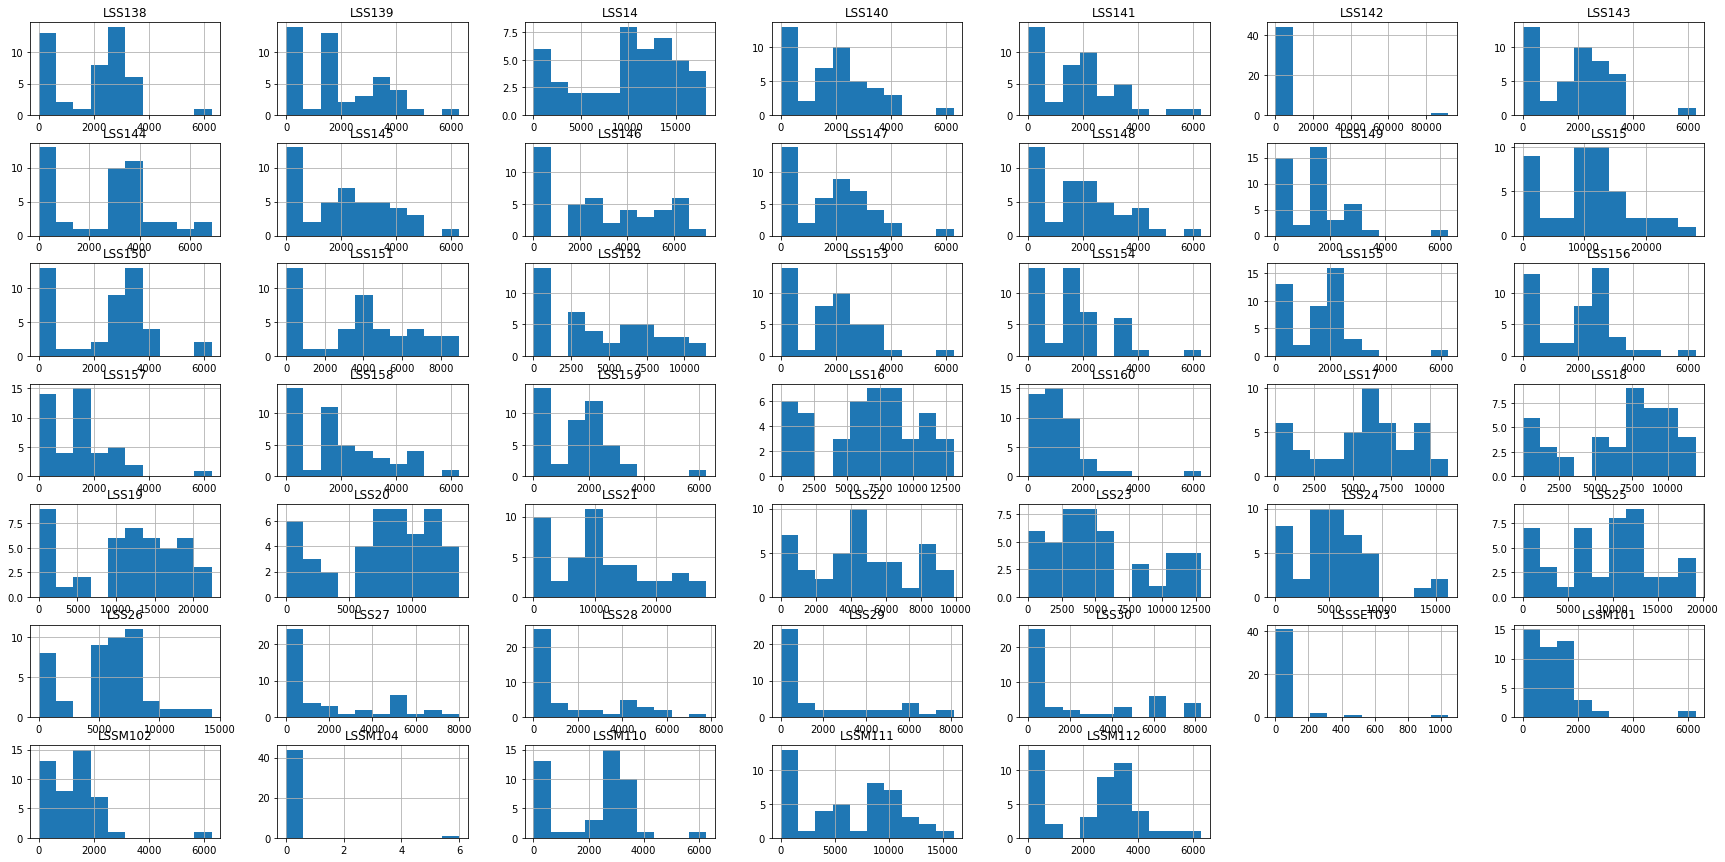

In [11]:
df_100 = df.iloc[:,51:100]
df_100.hist(figsize=(30,15))
plt.show()

# Scatter Plot for all columns


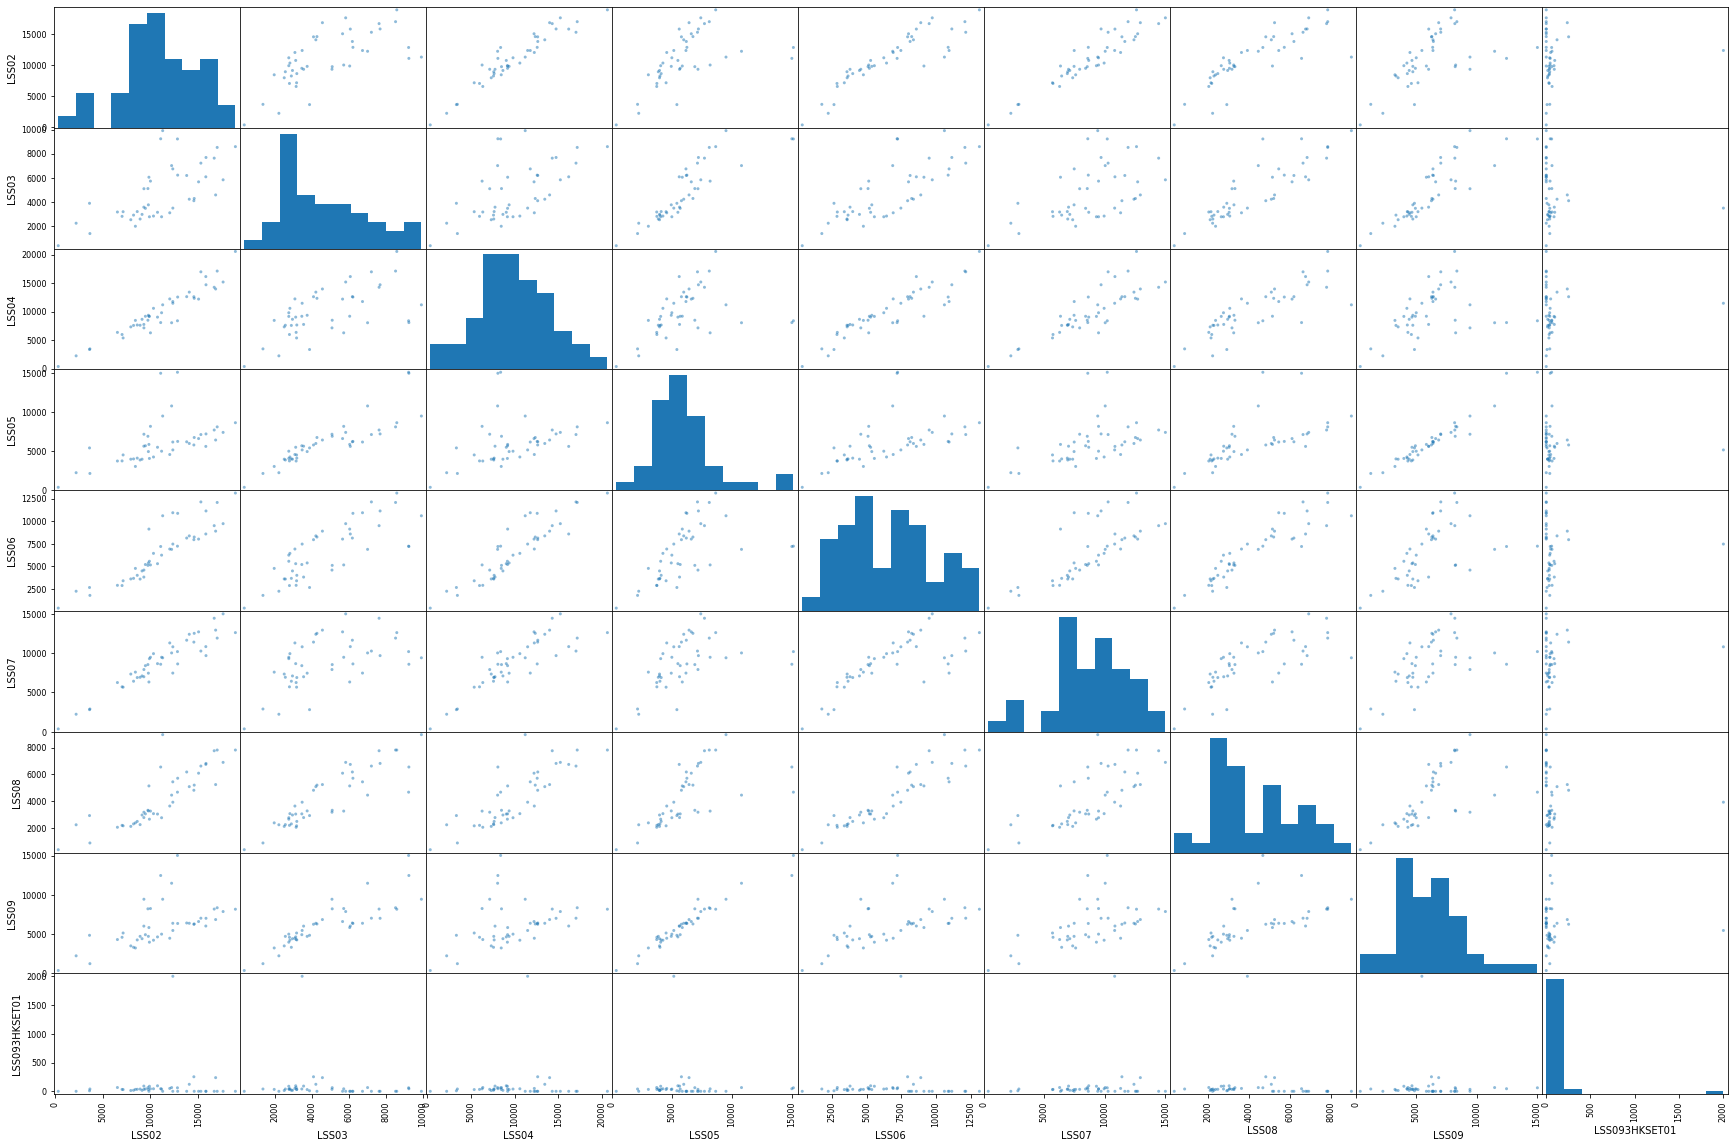

In [12]:
pd.plotting.scatter_matrix(df_50.iloc[:,1:10], figsize=(30,20))
plt.show()


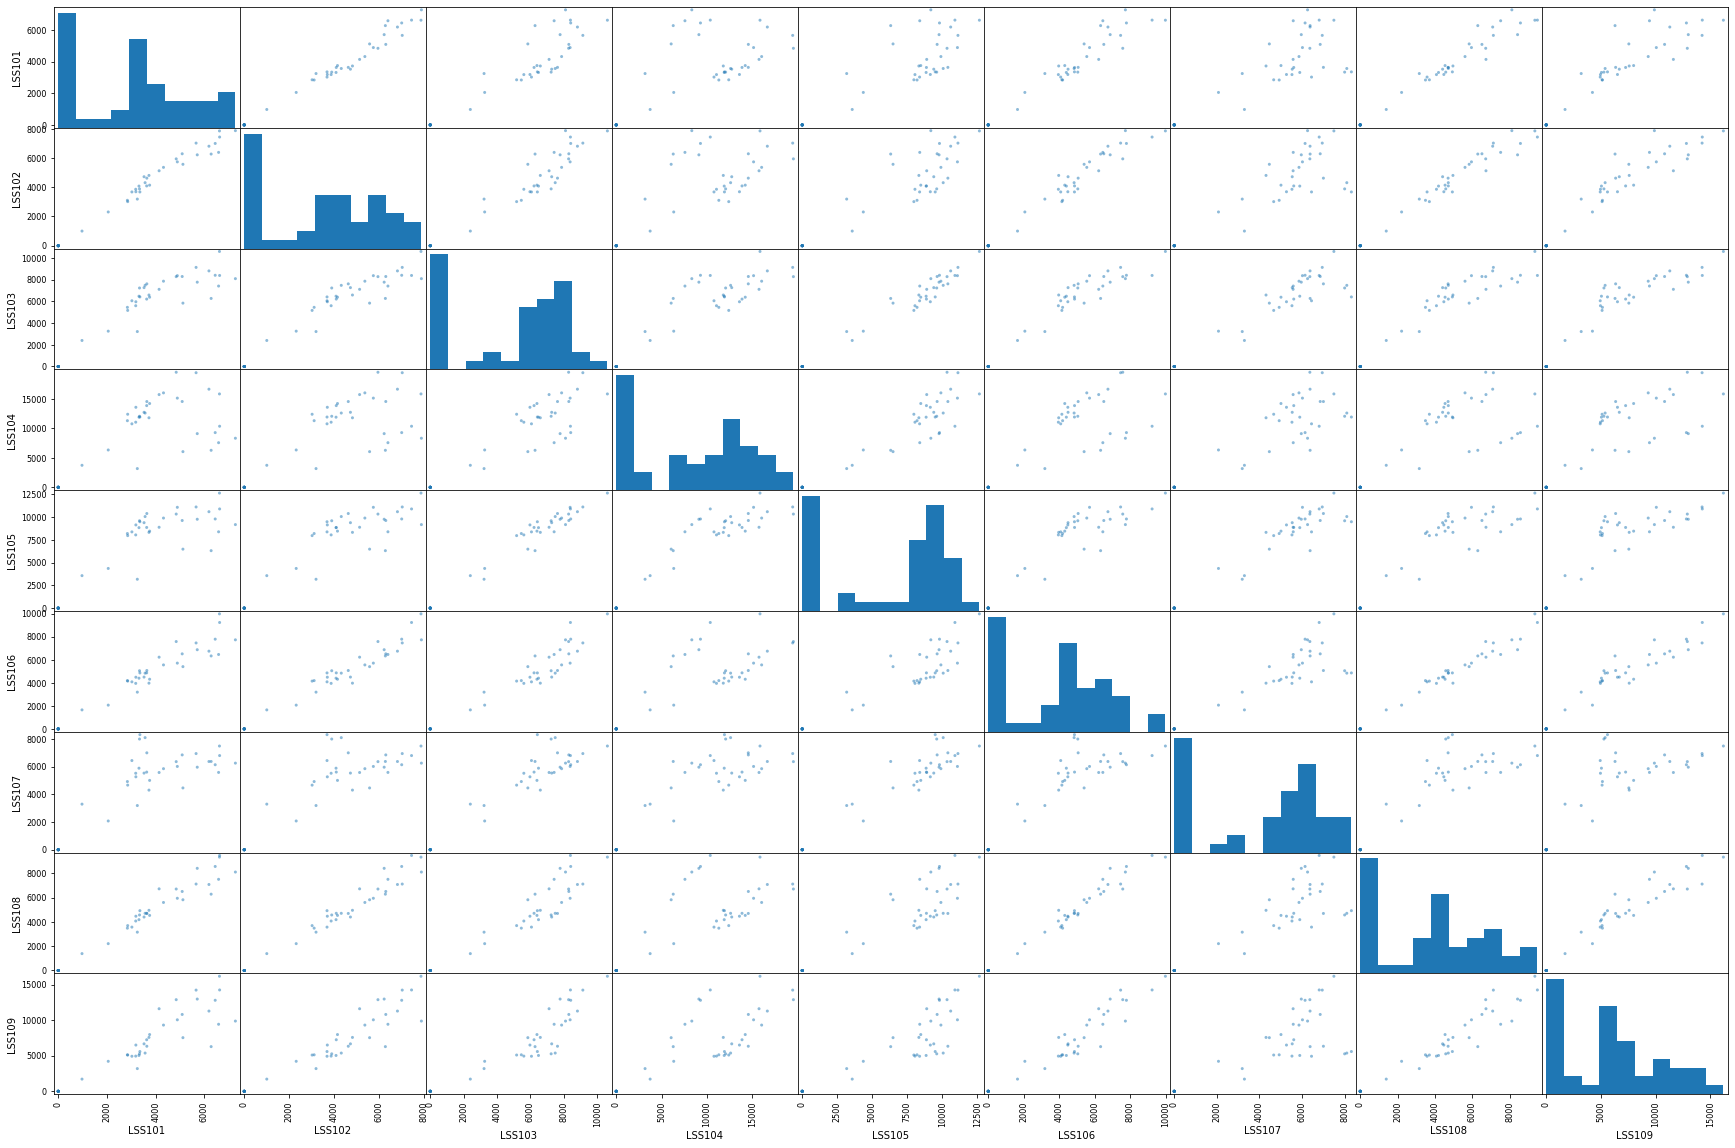

In [13]:
pd.plotting.scatter_matrix(df_50.iloc[:,11:20], figsize=(30,20))
plt.show()

# As the observation numbers are not sufficient, the visual confimration of distinct correlation is not confirmed. Correlation Priority


In [14]:

df_50_corr_mat = df_50.corr()
df_50_corr_mat.head()
#df_apt_weather_corr_mat["Total Electric Demand"].sort_values(ascending=False)

,LSS01,LSS02,LSS03,LSS04,LSS05,LSS06,LSS07,LSS08,LSS09,LSS093HKSET01,...,LSS128,LSS129,LSS13,LSS130,LSS131,LSS132,LSS133,LSS134,LSS135,LSS136
LSS01,1.000000,0.934027,0.733919,0.854893,0.720468,0.827354,0.885960,0.812563,0.702295,0.087547,...,0.181548,0.186059,0.212955,0.176571,0.177576,0.039253,0.014851,0.028724,0.148481,0.053124
LSS02,0.934027,1.000000,0.668554,0.947716,0.542953,0.888138,0.938335,0.834350,0.569356,0.070553,...,0.143546,0.147912,0.152954,0.097205,0.121687,0.002324,-0.080814,-0.012063,0.107679,0.004049
LSS03,0.733919,0.668554,1.000000,0.595455,0.865904,0.785149,0.539941,0.882825,0.858265,-0.115031,...,-0.255318,-0.246726,-0.335861,-0.105308,-0.220485,-0.377728,-0.169286,-0.387708,-0.226418,-0.268077
LSS04,0.854893,0.947716,0.595455,1.000000,0.370168,0.909947,0.849983,0.822009,0.385009,0.058386,...,-0.009687,-0.002270,0.044428,-0.102834,-0.046086,-0.140033,-0.287078,-0.148448,-0.070971,-0.175047
LSS05,0.720468,0.542953,0.865904,0.370168,1.000000,0.539981,0.504172,0.642621,0.968593,-0.040396,...,0.050202,0.048872,0.010714,0.217089,0.101576,-0.031192,0.222472,-0.041855,0.096661,0.078227


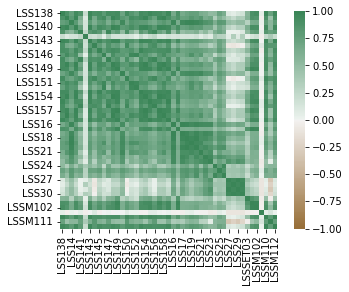

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_1 = df_50.corr()
correlation_2 = df_100.corr()
correlation_full = df.corr()

axis_corr = sns.heatmap(
correlation_2,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

In [18]:
corr = correlation_full["LSS01"].sort_values(ascending=False)
corr.head()


LSS01    1.000000
LSS12    0.958000
LSS02    0.934027
LSS07    0.885960
LSS04    0.854893
Name: LSS01, dtype: float64

In [ ]:
# VISUALIZATION IN BAR PLOT

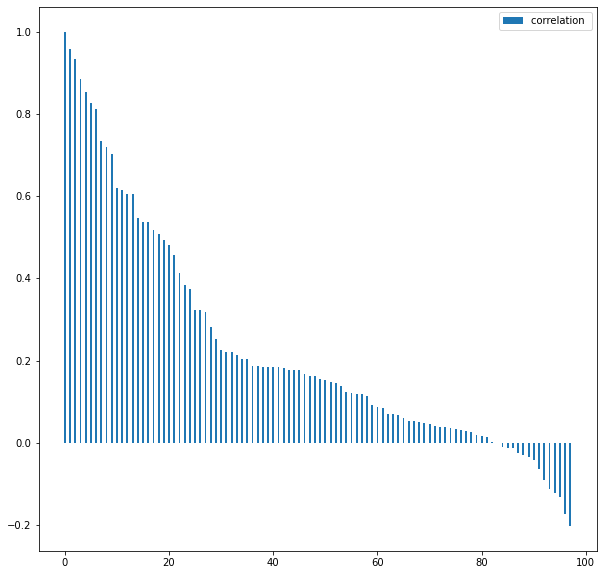

In [19]:
import numpy as np
x = np.arange(len(corr))
width = 0.35
#label = y_mean.index
plt.figure(figsize=(10,10))
plt.bar(x, corr, width,label="correlation ")
plt.legend()
plt.show()


# Standardization using pre-Processing


In [20]:

from sklearn.preprocessing import StandardScaler



In [21]:

#Setting the features
features1 =  df.columns
features = list(features1)

# separating
x = df.loc[:, features].values

# standardization
df_std = StandardScaler().fit_transform(x)



In [22]:
Cov = np.cov(df_std.T)
Cov

array([[ 1.02272727,  0.95525452,  0.75059865, ...,  0.04834873,
        -0.12564572,  0.11689856],
       [ 0.95525452,  1.02272727,  0.68374828, ..., -0.02194224,
        -0.26344515,  0.01288874],
       [ 0.75059865,  0.68374828,  1.02272727, ..., -0.345898  ,
        -0.26450377, -0.31036591],
       ...,
       [ 0.04834873, -0.02194224, -0.345898  , ...,  1.02272727,
         0.8072984 ,  0.99897939],
       [-0.12564572, -0.26344515, -0.26450377, ...,  0.8072984 ,
         1.02272727,  0.77306481],
       [ 0.11689856,  0.01288874, -0.31036591, ...,  0.99897939,
         0.77306481,  1.02272727]])

In [23]:
eig_vals, eig_vecs = np.linalg.eig(Cov)
eig_vals[0], eig_vals[1], eig_vals[2], eig_vals[3]

((63.453992667163675+0j),
 (14.538396473552014+0j),
 (7.253700947935053+0j),
 (5.124284586914087+0j))

In [24]:

(eig_vals[0]+eig_vals[1])/sum(eig_vals)

(0.7781553565060064+0j)

In [25]:
(eig_vals[0]+eig_vals[1]+eig_vals[2])/sum(eig_vals)


(0.8505278829706646+0j)

# 77.8% of the variance of original dataset can be explained using only 2 Principal Components

# 85% of the variance of original dataset can be explained using only 2 Principal Components

In [26]:
projected_X = df_std.dot(eig_vecs.T[0])
projected_X

array([-11.6041097 +0.j, -11.6800787 +0.j, -11.96065886+0.j,
       -11.78434254+0.j, -11.78408831+0.j, -11.55012449+0.j,
       -11.10662974+0.j, -11.22006462+0.j, -11.06722995+0.j,
        -9.72428317+0.j,  -8.38216261+0.j,  -8.84094391+0.j,
        -7.79033411+0.j,  17.33053519+0.j,   5.62824497+0.j,
         6.83898368+0.j,   9.81570967+0.j,   8.72909507+0.j,
         9.57365712+0.j,  10.97801644+0.j,   6.94901326+0.j,
        11.35915372+0.j,   3.82367815+0.j,   5.89535424+0.j,
         6.93944264+0.j,   5.01835629+0.j,   5.02046744+0.j,
        -5.55347798+0.j,   0.03153141+0.j,   4.30081168+0.j,
         4.21736509+0.j,   2.07236425+0.j,   2.83310615+0.j,
         1.56651086+0.j,  -0.22903711+0.j,   0.02605929+0.j,
         3.02290886+0.j,   0.91262119+0.j,   4.48349745+0.j,
         1.89043854+0.j,   1.15066201+0.j,   4.25581492+0.j,
         3.32562045+0.j,   3.12208251+0.j,  -6.83353671+0.j])

In [27]:
result = pd.DataFrame(projected_X, columns = ['Principal Component1'])
df1_time = df1.iloc[:,0]
result


,Principal Component1
0,-11.604110+0.000000j
1,-11.680079+0.000000j
2,-11.960659+0.000000j
3,-11.784343+0.000000j
4,-11.784088+0.000000j
5,-11.550124+0.000000j
6,-11.106630+0.000000j
7,-11.220065+0.000000j
8,-11.067230+0.000000j
9,-9.724283+0.000000j


In [28]:
# 2d Projection

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df_std)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2']);

principalDf
#finalDF =  pd.concat([principalDf, df[['features']]], axis=1)

                                                                  

,PC 1,PC 2
0,-11.604110,-6.031374
1,-11.680079,-4.530138
2,-11.960659,1.594801
3,-11.784343,-0.775819
4,-11.784088,0.142070
5,-11.550124,0.803364
6,-11.106630,2.648317
7,-11.220065,3.392884
8,-11.067230,2.802952
9,-9.724283,6.656720


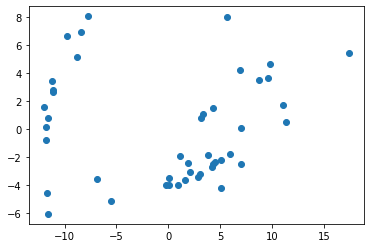

In [29]:
# Visualization

plt.scatter(principalDf['PC 1'], principalDf['PC 2'])
plt.show()


In [32]:
# 3d Projection

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(df_std)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2', 'PC 3']);

principalDf
#finalDF =  pd.concat([principalDf, df[['features']]], axis=1)

                                                                  

,PC 1,PC 2,PC 3
0,-11.604110,-6.031374,-0.433933
1,-11.680079,-4.530138,-0.192021
2,-11.960659,1.594801,0.812472
3,-11.784343,-0.775819,0.375366
4,-11.784088,0.142070,0.469688
5,-11.550124,0.803364,0.270034
6,-11.106630,2.648317,0.088612
7,-11.220065,3.392884,0.318079
8,-11.067230,2.802952,0.037109
9,-9.724283,6.656720,-0.762148


# Plot 3D with PC 1, PC 2, PC 3.

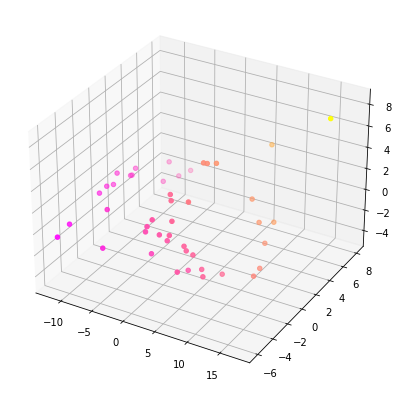

In [38]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection = "3d")
color_map = plt.get_cmap('spring')

ax.scatter3D(principalDf['PC 1'], principalDf['PC 2'], principalDf['PC 3'], c = (principalDf['PC 1']+ principalDf['PC 2']+ principalDf['PC 3']), cmap = color_map)

plt.show()



## K-Means Clustering
